In [1]:
import warnings
warnings.filterwarnings("ignore")


import requests
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import Holt
from sklearn.model_selection import TimeSeriesSplit 
import seaborn as sns
from wrangle import get_crypto_price
from scipy import stats

In [2]:
btc = get_crypto_price('btc', '2018-01-01', '2022-12-12')

In [3]:
btc

,btc_open,btc_high,btc_low,btc_close,btc_volume
date,,,,,
2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844
2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111
2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639
2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574
2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125
...,...,...,...,...,...
2022-12-08,16837.61,17298.58,16733.49,17224.82,122071.703410
2022-12-09,17223.70,17353.17,17058.21,17128.55,128639.484700
2022-12-10,17128.56,17225.12,17092.00,17127.49,75995.093800


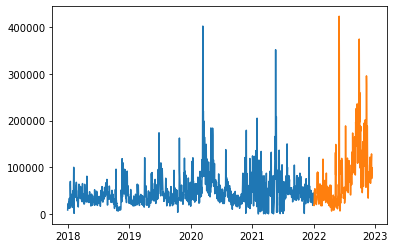

In [4]:
train = btc[:'2021']
test = btc['2022']
plt.plot(train.index, train.btc_volume)
plt.plot(test.index, test.btc_volume)

In [5]:
y = train.btc_volume

<AxesSubplot:xlabel='date'>

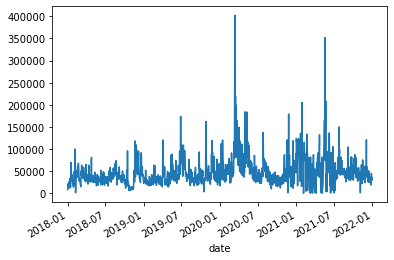

In [6]:
y.plot()

<AxesSubplot:xlabel='date'>

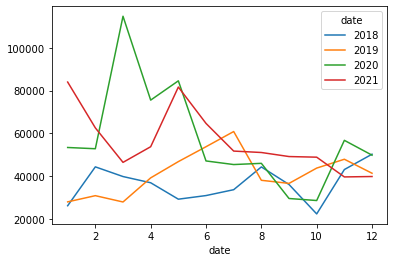

In [7]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()

<AxesSubplot:xlabel='date'>

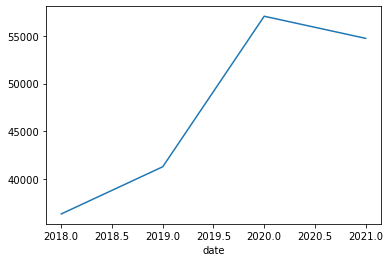

In [20]:
y.groupby(y.index.year).mean().plot()

date
2018    AxesSubplot(0.125,0.125;0.775x0.755)
2019    AxesSubplot(0.125,0.125;0.775x0.755)
2020    AxesSubplot(0.125,0.125;0.775x0.755)
2021    AxesSubplot(0.125,0.125;0.775x0.755)
Name: btc_volume, dtype: object

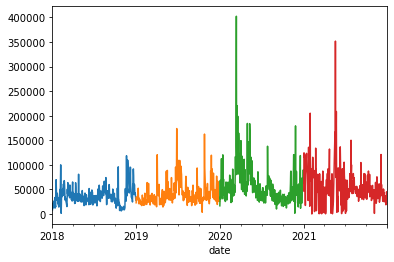

In [9]:
y.groupby([y.index.year]).plot()

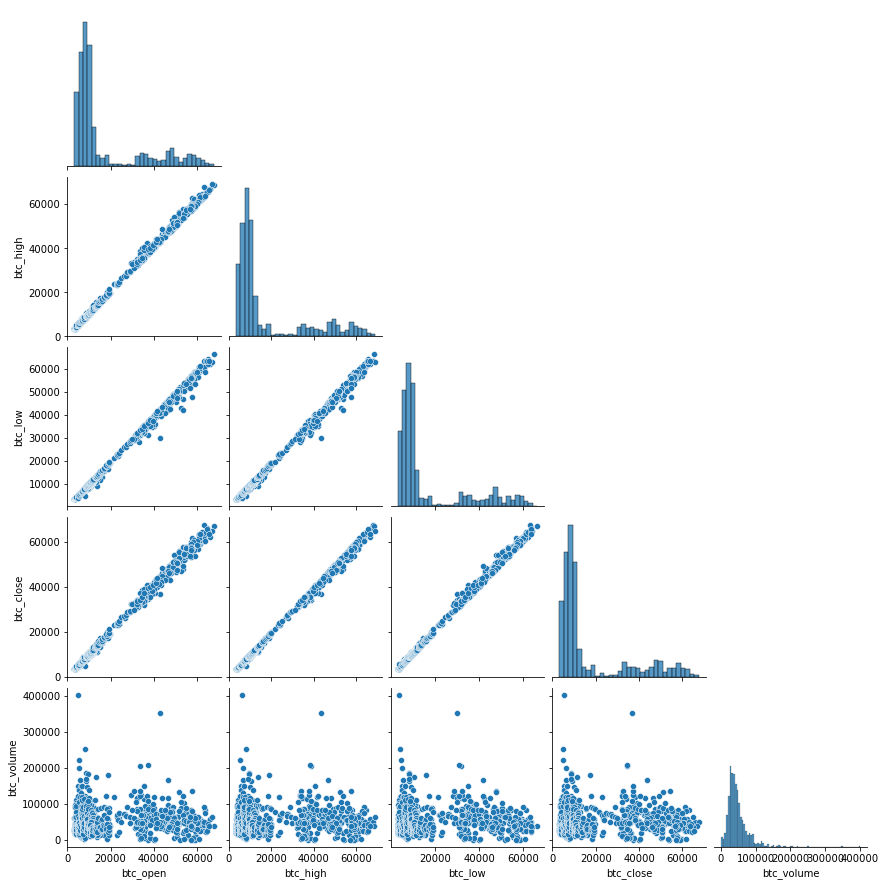

In [16]:
sns.pairplot(train, corner=True)
plt.show()

<AxesSubplot:xlabel='btc_open', ylabel='btc_volume'>

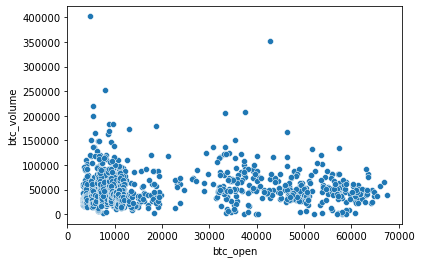

In [11]:
sns.scatterplot(train.btc_open, train.btc_volume)

# Statistical Analysis

In [12]:
corr, p = stats.pearsonr(train.btc_volume, train.btc_open)
corr, p

(0.09959102524261658, 0.00016884909137349367)

In [13]:
corr, p = stats.pearsonr(train.btc_volume, train.btc_close)
corr, p

(0.09650445250877894, 0.0002679796932165868)

In [14]:
corr, p = stats.pearsonr(train.btc_volume, train.btc_high)
corr, p

(0.10922682387877602, 3.6654914943423154e-05)

In [15]:
corr, p = stats.pearsonr(train.btc_volume, train.btc_low)
corr, p

(0.08086095055043382, 0.002276740232864559)